# Importing Libraries

In [3]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Loading the data sets using pandas

In [4]:
data=r'/content/heart.csv'

In [5]:
df=pd.read_csv(data)

# exploratory Data Analysis

In [ ]:
df.shape

(918, 12)

In [6]:
df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df.head(5)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [7]:
corr=df.corr()

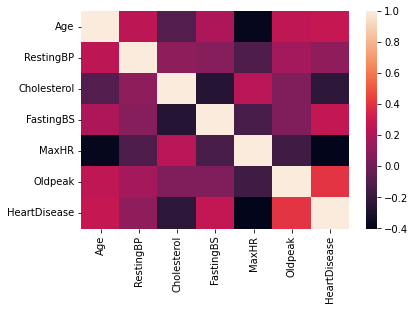

In [8]:
sns.heatmap(corr)
sns.set(rc={'figure.figsize':(5,2)})

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

1    508
0    410
Name: HeartDisease, dtype: int64


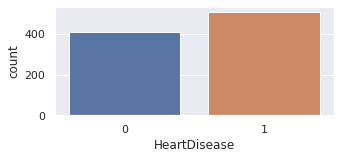

In [9]:
y = df["HeartDisease"]

sns.countplot(y)


HeartDisease_temp = df.HeartDisease.value_counts()

print(HeartDisease_temp)

M    725
F    193
Name: Sex, dtype: int64
1    508
0    410
Name: HeartDisease, dtype: int64


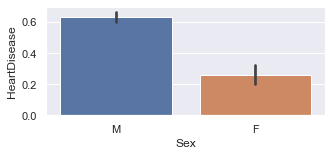

In [ ]:
sns.barplot(df['Sex'],y)
print(df['Sex'].value_counts())
print(df['HeartDisease'].value_counts())


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


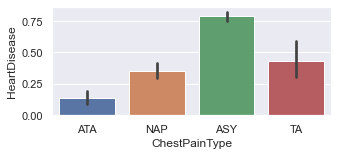

In [ ]:
sns.barplot(df["ChestPainType"],y)
print(df['ChestPainType'].value_counts())

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64


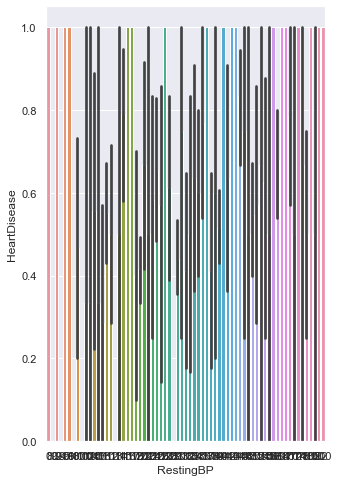

In [ ]:
sns.barplot(df["RestingBP"],y)
sns.set(rc = {'figure.figsize':(5,5)})
print(df['RestingBP'].value_counts())

0    704
1    214
Name: FastingBS, dtype: int64


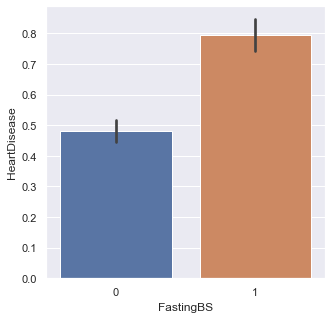

In [ ]:
sns.barplot(df["FastingBS"],y)
print(df['FastingBS'].value_counts())
sns.set(rc={'figure.figsize':(5,5)})


<bound method IndexOpsMixin.value_counts of 0      172
1      156
2       98
3      108
4      122
      ... 
913    132
914    141
915    115
916    174
917    173
Name: MaxHR, Length: 918, dtype: int64>


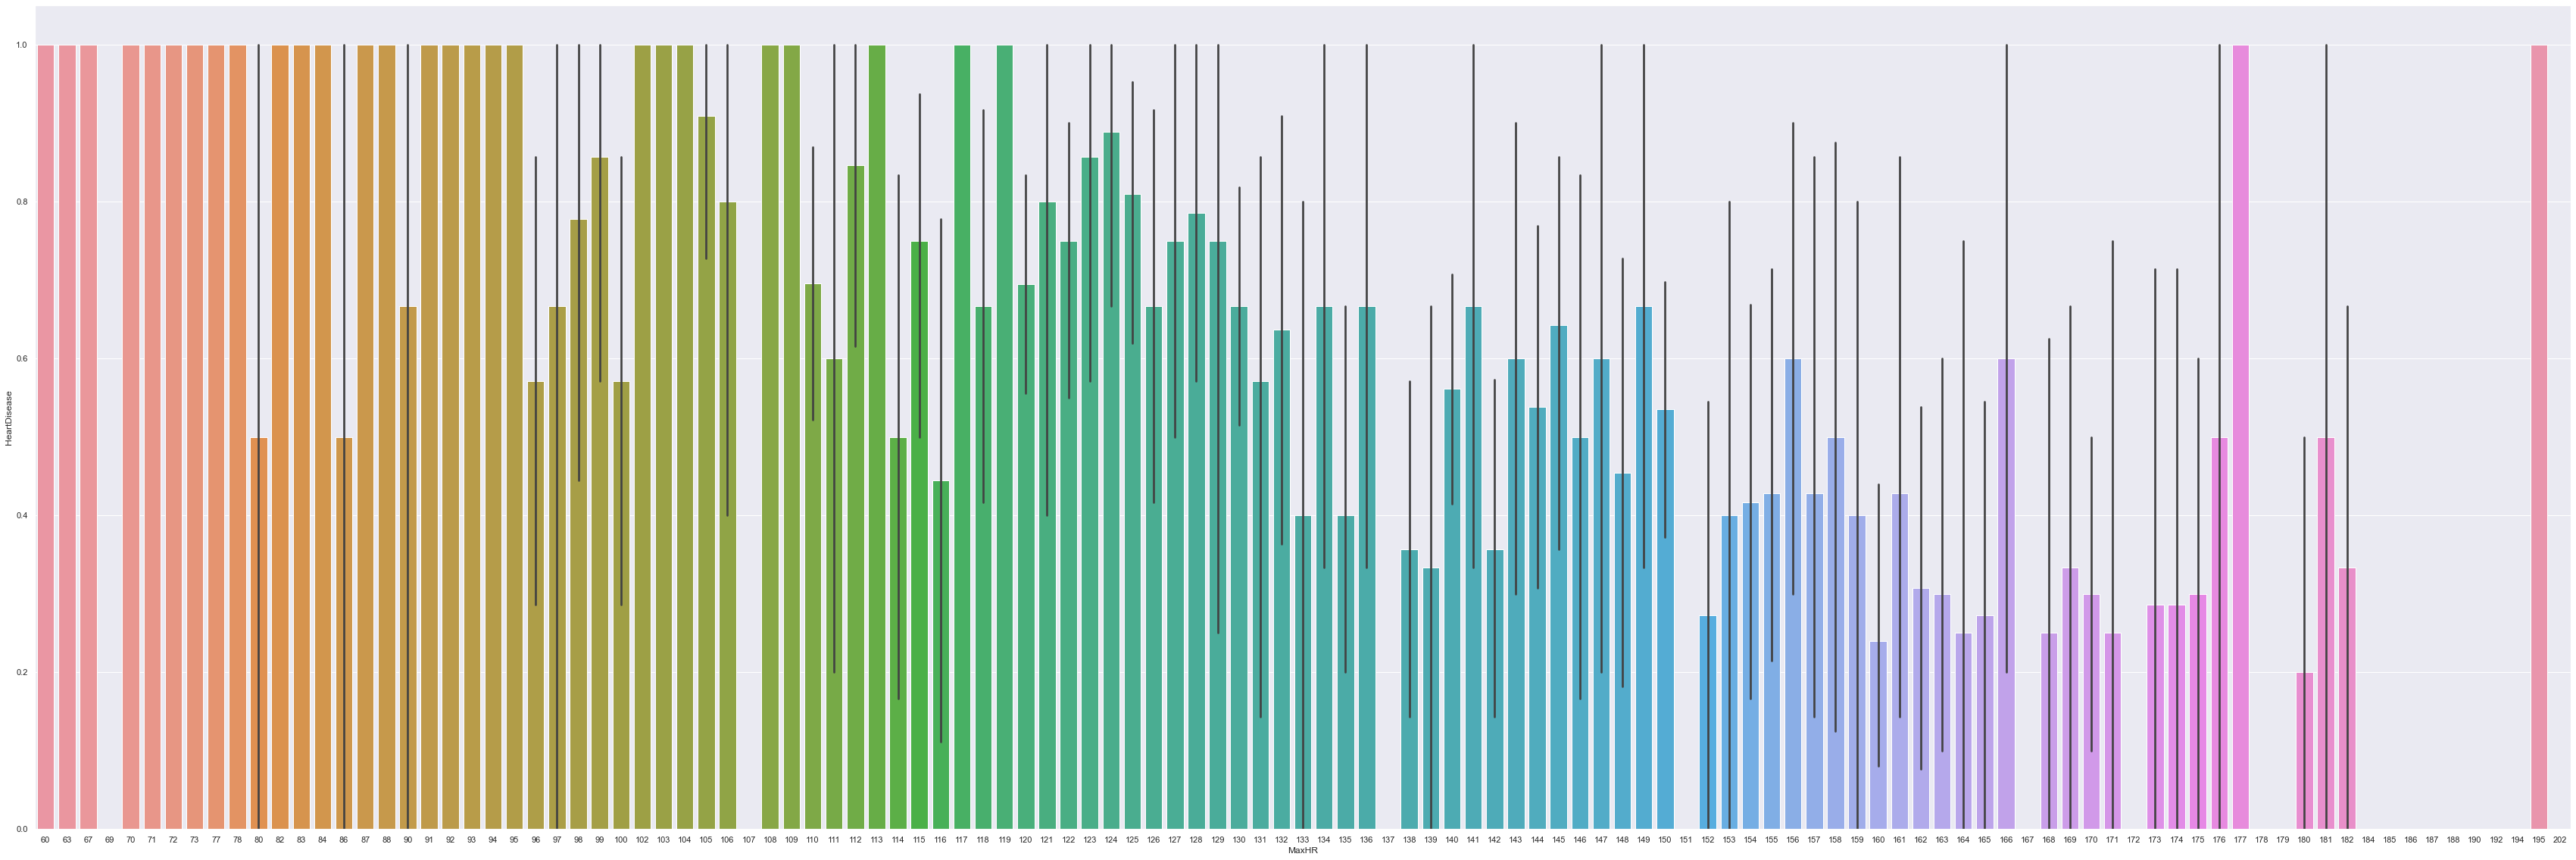

In [ ]:
sns.barplot(df['MaxHR'],y)

sns.set(rc = {'figure.figsize':(5,5)})
print(df['MaxHR'].value_counts)

N    547
Y    371
Name: ExerciseAngina, dtype: int64


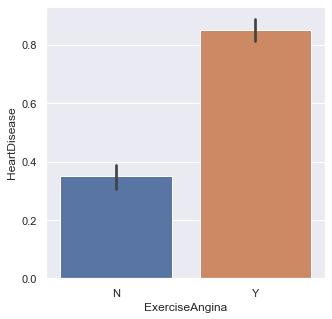

In [ ]:
sns.barplot(df['ExerciseAngina'],y)
sns.set(rc={'figure.figsize':(2,5)})
print(df['ExerciseAngina'].value_counts())

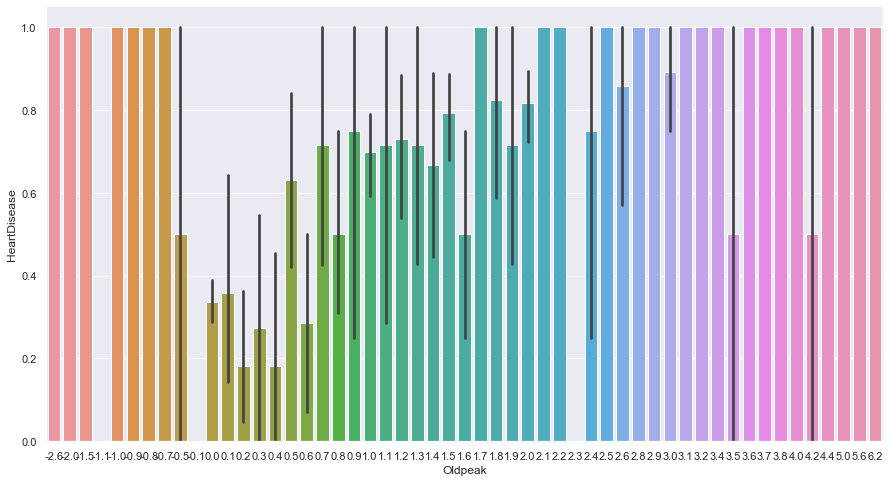

In [ ]:
sns.barplot(df['Oldpeak'],y)
sns.set(rc={'figure.figsize':(2,5)})

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


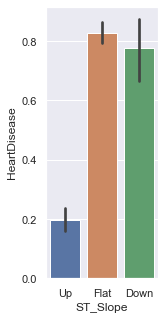

In [ ]:
sns.barplot(df['ST_Slope'],y)
sns.set(rc={'figure.figsize':(2,5)})
print(df['ST_Slope'].value_counts())


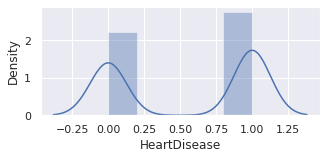

In [10]:
sns.distplot(df['HeartDisease'])

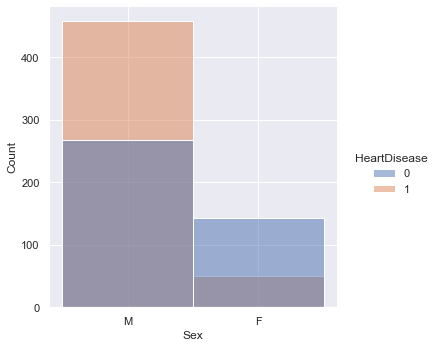

In [ ]:
sns.displot(x=df['Sex'],hue=df['HeartDisease'])

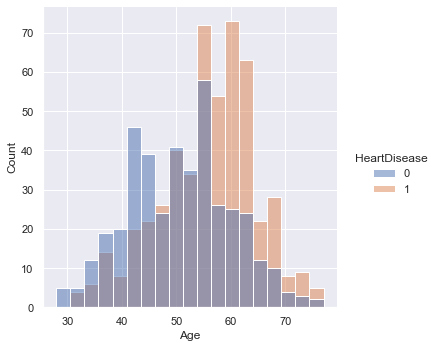

In [ ]:
sns.displot(x=df['Age'],hue=df['HeartDisease'])


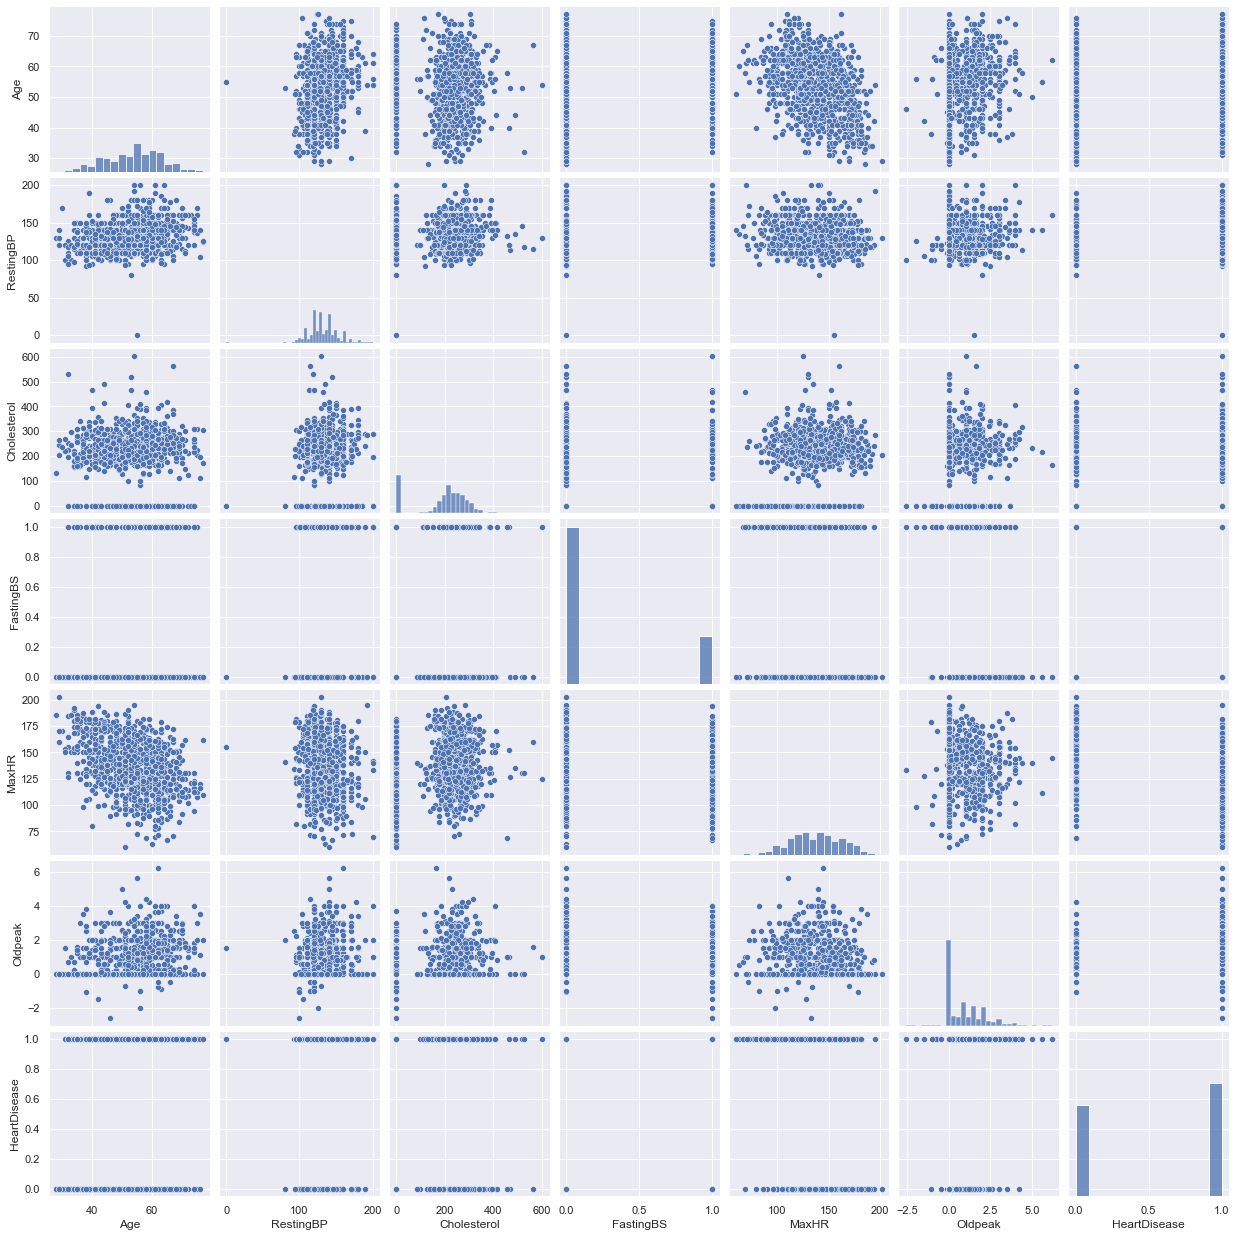

In [ ]:
sns.pairplot(df)

# Exploring Categorical variables

In [11]:
categorical_cols= df.select_dtypes(include=['object'])
categorical_cols.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
for cols in categorical_cols.columns:
    print(cols,'-', len(categorical_cols[cols].unique()),'Labels')

Sex - 2 Labels
ChestPainType - 4 Labels
RestingECG - 3 Labels
ExerciseAngina - 2 Labels
ST_Slope - 3 Labels


# Splitting the dataset into training and test set. 

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.3,random_state= 0)

# Encoding Categorical Variables

In [13]:
train['Sex'] = np.where(train['Sex'] == "M", 0, 1)
train['ExerciseAngina'] = np.where(train['ExerciseAngina'] == "N", 0, 1)
test['Sex'] = np.where(test['Sex'] == "M", 0, 1)
test['ExerciseAngina'] = np.where(test['ExerciseAngina'] == "N", 0, 1)

In [14]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,0,ASY,118,529,0,Normal,130,0,0.0,Flat,1
48,36,0,NAP,112,340,0,Normal,184,0,1.0,Flat,0
304,51,0,ASY,95,0,1,Normal,126,0,2.2,Flat,1
263,59,0,ASY,130,126,0,Normal,125,0,0.0,Flat,1
744,60,0,ASY,117,230,1,Normal,160,1,1.4,Up,1


In [15]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [16]:
train.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
76,32,0,118,529,0,130,0,0.0,1,1,0,0,0,0,1,0,0,1,0
48,36,0,112,340,0,184,0,1.0,0,0,0,1,0,0,1,0,0,1,0
304,51,0,95,0,1,126,0,2.2,1,1,0,0,0,0,1,0,0,1,0
263,59,0,130,126,0,125,0,0.0,1,1,0,0,0,0,1,0,0,1,0
744,60,0,117,230,1,160,1,1.4,1,1,0,0,0,0,1,0,0,0,1


In [17]:
test.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
306,55,0,115,0,1,155,0,0.1,1,1,0,0,0,0,1,0,0,1,0
711,66,0,120,302,0,151,0,0.4,0,1,0,0,0,1,0,0,0,1,0
298,51,0,110,0,1,92,0,0.0,1,1,0,0,0,0,1,0,0,1,0
466,55,0,120,0,0,125,1,2.5,1,0,0,1,0,0,0,1,0,1,0
253,62,0,140,271,0,152,0,1.0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
train.shape

(642, 19)

In [ ]:
test.shape

(276, 19)

In [ ]:
print(train)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
76    32    0        118          529          0    130               0   
48    36    0        112          340          0    184               0   
304   51    0         95            0          1    126               0   
263   59    0        130          126          0    125               0   
744   60    0        117          230          1    160               1   
..   ...  ...        ...          ...        ...    ...             ...   
835   54    0        110          239          0    126               1   
192   48    0        130          245          0    160               0   
629   57    1        128          303          0    159               0   
559   64    0        134          273          0    102               1   
684   47    0        108          243          0    152               0   

     Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
76       0.0             1     

# Extracting Dependent and Independent variables

In [18]:
x_train=train.drop(['HeartDisease'],1)
x_test=test.drop(['HeartDisease'],1)

y_train=train['HeartDisease']
y_test=test['HeartDisease']

In [ ]:
print(x_train)
print(y_train)



     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
76    32    0        118          529          0    130               0   
48    36    0        112          340          0    184               0   
304   51    0         95            0          1    126               0   
263   59    0        130          126          0    125               0   
744   60    0        117          230          1    160               1   
..   ...  ...        ...          ...        ...    ...             ...   
835   54    0        110          239          0    126               1   
192   48    0        130          245          0    160               0   
629   57    1        128          303          0    159               0   
559   64    0        134          273          0    102               1   
684   47    0        108          243          0    152               0   

     Oldpeak  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
76       0.0              

In [ ]:
print(x_test)
print(y_test)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
306   55    0        115            0          1    155               0   
711   66    0        120          302          0    151               0   
298   51    0        110            0          1     92               0   
466   55    0        120            0          0    125               1   
253   62    0        140          271          0    152               0   
..   ...  ...        ...          ...        ...    ...             ...   
49    41    0        110          289          0    170               0   
456   61    0        120            0          0     80               1   
342   61    0        110            0          1    113               0   
907   44    0        120          169          0    144               1   
116   38    0        120          282          0    170               0   

     Oldpeak  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
306      0.1              

# Fitting LogisticRegression

In [19]:
classifier =LogisticRegression(max_iter=10000,random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

# predicting the test result

In [21]:
y_pred=classifier.predict(x_test)

In [22]:
print(y_pred)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


In [23]:
score_lr = round(accuracy_score(y_pred,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.33 %


In [24]:
print("Train accuracy:",classifier.score(x_train, y_train))
print("Test accuracy:",classifier.score(x_test, y_test))

Train accuracy: 0.8769470404984424
Test accuracy: 0.8333333333333334


# Creating the Confusion matrix for LogisticRegression

In [25]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
print(cm)

[[ 86  27]
 [ 19 144]]


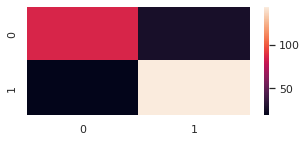

In [26]:
sns.heatmap(cm)
sns.set(rc={'figure.figsize':(5,5)})

# Fitting Decision Tree Classifier

In [27]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
print("Train accuracy:",classifier.score(x_train, y_train))
print("Test accuracy:",classifier.score(x_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8623188405797102


# Creating the Confusion matrix for Decision Tree classifier

In [29]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 86  27]
 [ 19 144]]


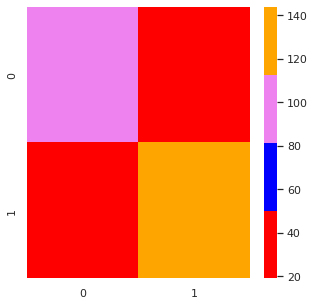

In [30]:
sns.heatmap(cm, cmap=['red','blue','violet','orange'])
sns.set(rc={'figure.figsize':(5,5)})

# Fitting Random Forest Classifier

In [31]:
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [32]:
y_pred=classifier.predict(x_test)
score_fr = round(accuracy_score(y_pred,y_test)*100,2)

print("The accuracy score achieved using RandomForest is: "+str(score_fr)+" %")


The accuracy score achieved using RandomForest is: 83.7 %


In [33]:
print("Train accuracy:",classifier.score(x_train, y_train))
print("Test accuracy:",classifier.score(x_test, y_test))

Train accuracy: 0.9937694704049844
Test accuracy: 0.8369565217391305


# Creating the Confusion matrix for Random Forest Classifier

In [34]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 96  17]
 [ 28 135]]


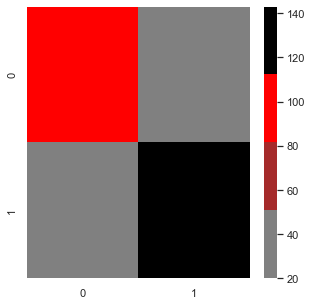

In [ ]:
sns.heatmap(cm, cmap=['grey','brown','red','black'])
sns.set(rc={'figure.figsize':(5,5)})

# Fitting K-NN classifier to the training set  

In [35]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred=classifier.predict(x_test)
score_kn = round(accuracy_score(y_pred,y_test)*100,2)

print("The accuracy score achieved using KNeighbors is: "+str(score_kn)+" %")

The accuracy score achieved using KNeighbors is: 69.57 %


In [37]:
print("Train accuracy:",classifier.score(x_train, y_train))
print("Test accuracy:",classifier.score(x_test, y_test))

Train accuracy: 0.7928348909657321
Test accuracy: 0.6956521739130435


# Creating the Confusion matrix for KNeighbors Classifier

In [38]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 72  41]
 [ 43 120]]


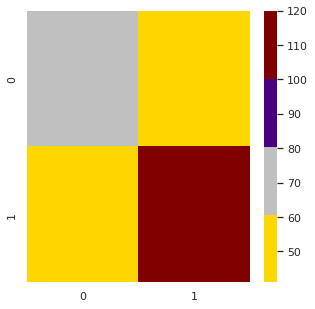

In [39]:
sns.heatmap(cm,cmap=['gold','silver','indigo','maroon'])
sns.set(rc={'figure.figsize':(5,5)})

# Fitting Naives bayes classifier 

In [40]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [41]:
y_pred=classifier.predict(x_test)
score_nb = round(accuracy_score(y_pred,y_test)*100,2)

print("The accuracy score achieved using Naives bayes is: "+str(score_nb)+" %")


The accuracy score achieved using Naives bayes is: 83.7 %


In [42]:
print("Train accuracy:",classifier.score(x_train, y_train))
print("Test accuracy:",classifier.score(x_test, y_test))

Train accuracy: 0.8629283489096573
Test accuracy: 0.8369565217391305


# Creating the Confusion matrix for Naives bayes Classifier

In [43]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 88  25]
 [ 20 143]]


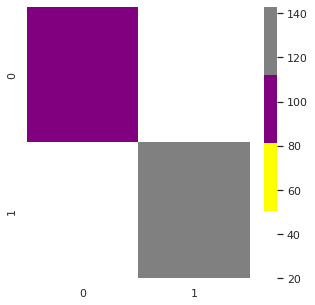

In [44]:
sns.heatmap(cm, cmap=['white','yellow','purple','grey'])
sns.set(rc={'figure.figsize':(5,5)})

# Fitting support vector classifier

In [ ]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

NameError: ignored

In [ ]:
y_pred=classifier.predict(x_test)
score_svm = round(accuracy_score(y_pred,y_test)*100,2)

print("The accuracy score achieved using  support vector machine is: "+str(score_svm)+" %")

In [ ]:
print("Train accuracy:",classifier.score(x_train, y_train))
print("Test accuracy:",classifier.score(x_test, y_test))

# Creating the Confusion matrix for support vector Classifier

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

NameError: ignored

In [ ]:
sns.heatmap(cm, cmap=['white','violet','pink','green'])

sns.set(rc={'figure.figsize':(5,5)})

NameError: ignored

# Comparison Report

In [ ]:
scores = [score_lr,score_nb,score_svm,score_kn,score_dt,score_fr]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 83.7 %
The accuracy score achieved using Naive Bayes is: 83.7 %
The accuracy score achieved using Support Vector Machine is: 83.7 %
The accuracy score achieved using K-Nearest Neighbors is: 83.7 %
The accuracy score achieved using Decision Tree is: 83.7 %
The accuracy score achieved using Random Forest is: 83.7 %


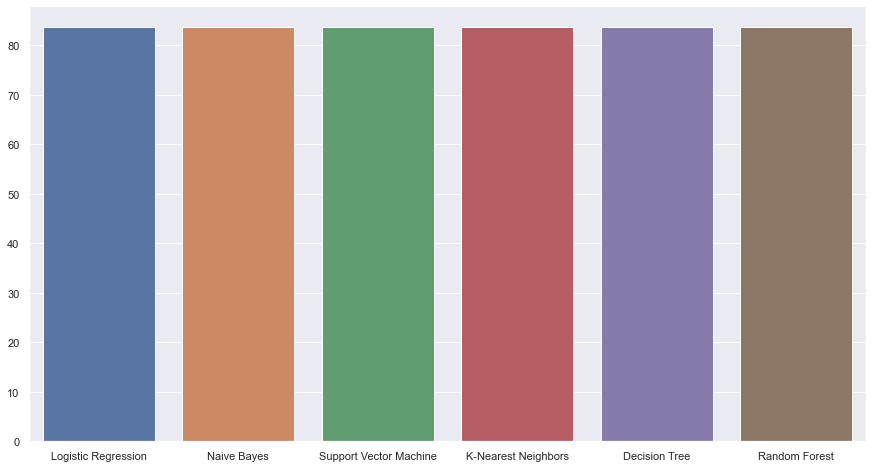

In [ ]:
sns.barplot(algorithms,scores)
sns.set(rc={'figure.figsize':(15,8)})
